In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv("../Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [11]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

In [13]:
from sklearn.cross_validation import train_test_split

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_X = StandardScaler()

In [19]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier = LogisticRegression(random_state=0)

In [23]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[52,  6],
       [ 3, 19]])

In [30]:
from matplotlib.colors import ListedColormap

C:\Users\540607\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\540607\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


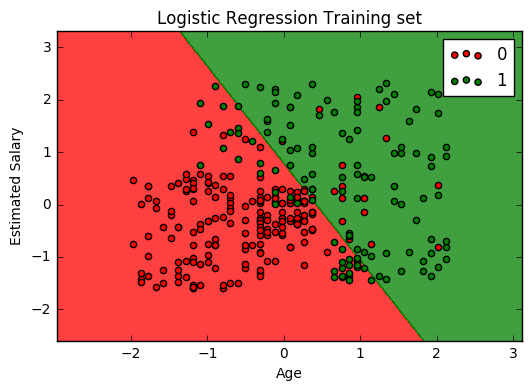

In [40]:
X_set,y_set = X_train, y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,stop = X_set[:, 0].max()+1,step=0.01),
                    np.arange(start = X_set[:,1].min() - 1,stop = X_set[:, 1].max()+1,step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set ==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\540607\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\540607\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


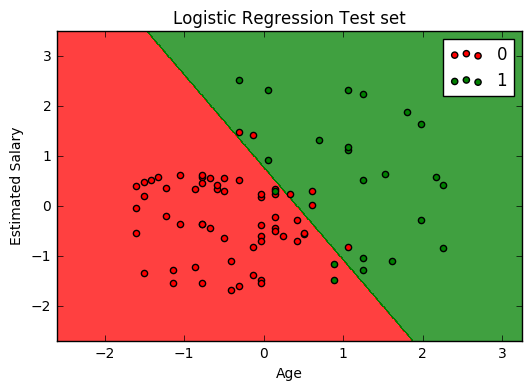

In [41]:
X_set,y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,stop = X_set[:, 0].max()+1,step=0.01),
                    np.arange(start = X_set[:,1].min() - 1,stop = X_set[:, 1].max()+1,step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set ==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression Test set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()